In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import re

import matplotlib.pyplot as plt

In [68]:
data_aplicnt    = pd.read_csv("applicant.csv")
data_loan_appli = pd.read_csv("loan.csv")

In [69]:
data_aplicnt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   applicant_id                                              1000 non-null   int64 
 1   Primary_applicant_age_in_years                            1000 non-null   int64 
 2   Gender                                                    1000 non-null   object
 3   Marital_status                                            1000 non-null   object
 4   Number_of_dependents                                      1000 non-null   int64 
 5   Housing                                                   1000 non-null   object
 6   Years_at_current_residence                                1000 non-null   int64 
 7   Employment_status                                         1000 non-null   object
 8   Has_been_employed_for_at_leas

In [70]:
data_aplicnt.head()

,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Telephone,Foreign_worker,Savings_account_balance,Balance_in_existing_bank_account_(lower_limit_of_bucket),Balance_in_existing_bank_account_(upper_limit_of_bucket)
0,1469590,67,male,single,1,own,4,skilled employee / official,7 years,NaN,Registered under the applicant's name,1,NaN,NaN,0
1,1203873,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,NaN,1,Low,0,2 lac
2,1432761,49,male,single,2,own,3,unskilled - resident,4 years,7 years,NaN,1,Low,NaN,NaN
3,1207582,45,male,single,2,for free,4,skilled employee / official,4 years,7 years,NaN,1,Low,NaN,0
4,1674436,53,male,single,2,for free,4,skilled employee / official,1 year,4 years,NaN,1,Low,NaN,0


Features having nan values are:

1.Telephone  
2.Balance_in_existing_bank_account_(lower_limit_of_bucket)  
3.Balance_in_existing_bank_account_(upper_limit_of_bucket)  
4.Has_been_employed_for_at_most  
5.Has_been_employed_for_at_least  


As Telephoneb & Balance_in_existing_bank_account_(lower_limit_of_bucket) are having less cell having information so they can be dropped.


Features 'Balance_in_existing_bank_account_(upper_limit_of_bucket)', 'Has_been_employed_for_at_least                            ', 'Has_been_employed_for_at_most' can be converted from string to integer values to get proper insight.

In [71]:
data_aplicnt = data_aplicnt.drop(['Telephone','Balance_in_existing_bank_account_(lower_limit_of_bucket)'],axis =1)


In [72]:
data_aplicnt["Has_been_employed_for_at_least"]                           =data_aplicnt["Has_been_employed_for_at_least"][data_aplicnt["Has_been_employed_for_at_least"].isnull()!=True].apply(lambda x:int(re.sub("\D","",x)))
data_aplicnt["Has_been_employed_for_at_most"]                            =data_aplicnt["Has_been_employed_for_at_most"][data_aplicnt["Has_been_employed_for_at_most"].isnull()!=True].apply(lambda x:int(re.sub("\D","",x)))
data_aplicnt["Balance_in_existing_bank_account_(upper_limit_of_bucket)"] =data_aplicnt["Balance_in_existing_bank_account_(upper_limit_of_bucket)"][data_aplicnt["Balance_in_existing_bank_account_(upper_limit_of_bucket)"].isnull()!=True].apply(lambda x:int(re.sub("\D","",x)))

In [73]:
data_aplicnt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   applicant_id                                              1000 non-null   int64  
 1   Primary_applicant_age_in_years                            1000 non-null   int64  
 2   Gender                                                    1000 non-null   object 
 3   Marital_status                                            1000 non-null   object 
 4   Number_of_dependents                                      1000 non-null   int64  
 5   Housing                                                   1000 non-null   object 
 6   Years_at_current_residence                                1000 non-null   int64  
 7   Employment_status                                         1000 non-null   object 
 8   Has_been_employed_f

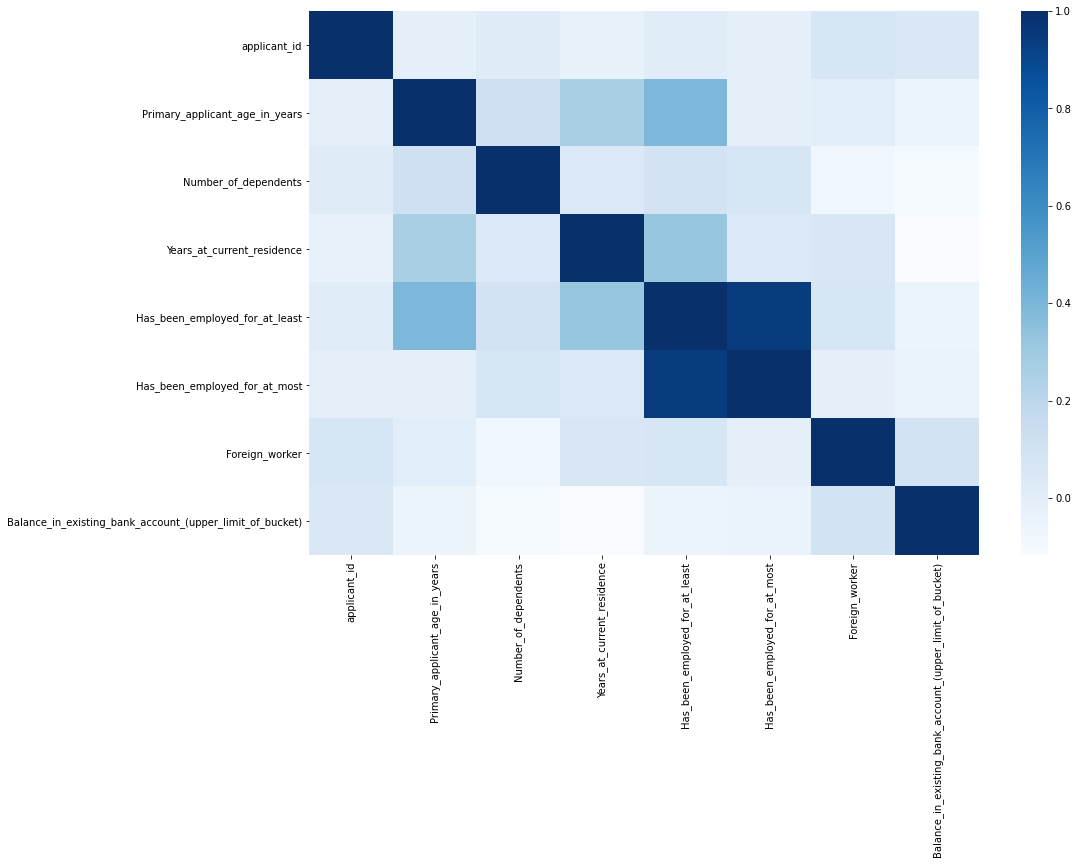

In [74]:
sns.heatmap(data_aplicnt.corr(),cmap='Blues')
plt.gcf().set_size_inches(15, 10)


From above heatmap it is observed that feature 'Has_been_employed_for_at_least' is correlated with 'Years_at_current_residence' and 'Primary_applicant_age_in_years'.

So we can drop feature 'Has_been_employed_for_at_least'

In [75]:
data_loan_appli.head()

,loan_application_id,applicant_id,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,d68d975e-edad-11ea-8761-1d6f9c1ff461,1469590,6,electronic equipment,1169000,4,real estate,0,0,NaN,2,critical/pending loans at other banks,0
1,d68d989e-edad-11ea-b1d5-2bcf65006448,1203873,48,electronic equipment,5951000,2,real estate,0,0,NaN,1,existing loans paid back duly till now,1
2,d68d995c-edad-11ea-814a-1b6716782575,1432761,12,education,2096000,2,real estate,0,0,NaN,1,critical/pending loans at other banks,0
3,d68d99fc-edad-11ea-8841-17e8848060ae,1207582,42,FF&E,7882000,2,building society savings agreement/life insurance,0,1,NaN,1,existing loans paid back duly till now,0
4,d68d9a92-edad-11ea-9f3d-1f8682db006a,1674436,24,new vehicle,4870000,3,NaN,0,0,NaN,2,delay in paying off loans in the past,1


Features having nan values are:

1.Purpose  
2.Property   
3.Other_EMI_plans   

As Other_EMI_plans is having less cell having information so they can be dropped.

Also feature 'loan_application_id' can be dropped.


<AxesSubplot:>

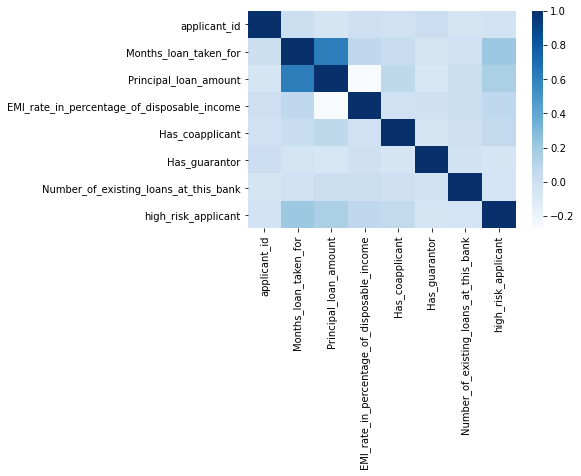

In [76]:
sns.heatmap(data_loan_appli.corr(),cmap='Blues')

features 'Months_loan_taken_for' & 'Principal_loan_amount' are highly correlated.

To see relation of applicant data with creditworthiness need to add 'High-rsik_applicant' from loan data

In [77]:
data_aplicnt['high_risk_applicant'] = np.where(data_aplicnt['applicant_id']==data_loan_appli['applicant_id'],data_loan_appli['high_risk_applicant'],np.nan)

In [78]:
data_aplicnt.head()

,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Foreign_worker,Savings_account_balance,Balance_in_existing_bank_account_(upper_limit_of_bucket),high_risk_applicant
0,1469590,67,male,single,1,own,4,skilled employee / official,7.0,NaN,1,NaN,0.0,0.0
1,1203873,22,female,divorced/separated/married,1,own,2,skilled employee / official,1.0,4.0,1,Low,2.0,1.0
2,1432761,49,male,single,2,own,3,unskilled - resident,4.0,7.0,1,Low,NaN,0.0
3,1207582,45,male,single,2,for free,4,skilled employee / official,4.0,7.0,1,Low,0.0,0.0
4,1674436,53,male,single,2,for free,4,skilled employee / official,1.0,4.0,1,Low,0.0,1.0


<AxesSubplot:xlabel='Has_been_employed_for_at_most', ylabel='Count'>

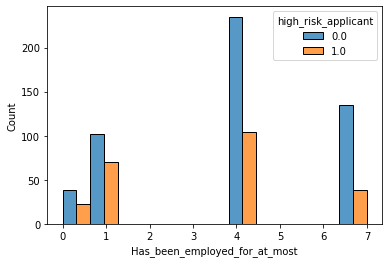

In [79]:
sns.histplot(data=data_aplicnt,x='Has_been_employed_for_at_most',hue='high_risk_applicant',multiple="dodge",shrink=1)


from this bar graph it can be seen employees with 4 years of experience are mre credtworthy as compare to low or high number of years of employement.

<AxesSubplot:xlabel='high_risk_applicant', ylabel='Count'>

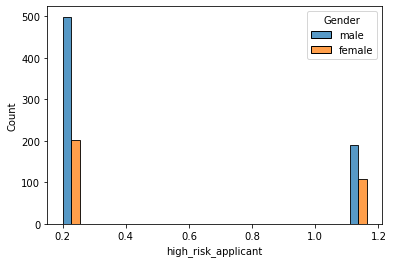

In [80]:
sns.histplot(data=data_aplicnt,hue='Gender',x='high_risk_applicant',multiple="dodge",shrink=0.6)

Here this grpah shows that females are more creit worthy as comparedto males.

<AxesSubplot:xlabel='Count', ylabel='high_risk_applicant'>

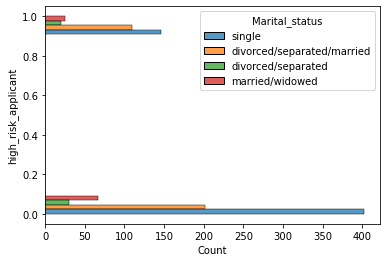

In [81]:
sns.histplot(data=data_aplicnt,hue='Marital_status',y='high_risk_applicant',multiple="dodge",shrink=1)

This plot shows creditworthiness of single people is Higher as compared to other status of marital information.

<AxesSubplot:ylabel='Primary_applicant_age_in_years'>

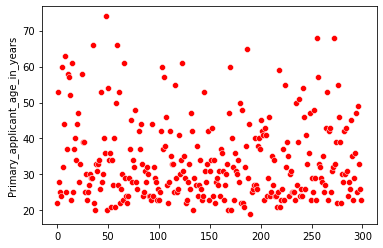

In [82]:
# plotting Age of High risk apllicant

sns.scatterplot(y=data_aplicnt['Primary_applicant_age_in_years'][data_aplicnt['high_risk_applicant']==1.0],x=np.arange(0,300),color='red')

This curve shows that applicant age between higher 20's to 32~33 years are more likely to be have High credit risk.

### Now having some insights from loan data

In [83]:
data_loan_appli.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   loan_application_id                          1000 non-null   object
 1   applicant_id                                 1000 non-null   int64 
 2   Months_loan_taken_for                        1000 non-null   int64 
 3   Purpose                                      988 non-null    object
 4   Principal_loan_amount                        1000 non-null   int64 
 5   EMI_rate_in_percentage_of_disposable_income  1000 non-null   int64 
 6   Property                                     846 non-null    object
 7   Has_coapplicant                              1000 non-null   int64 
 8   Has_guarantor                                1000 non-null   int64 
 9   Other_EMI_plans                              186 non-null    object
 10  Number_of_exi

<AxesSubplot:ylabel='Months_loan_taken_for'>

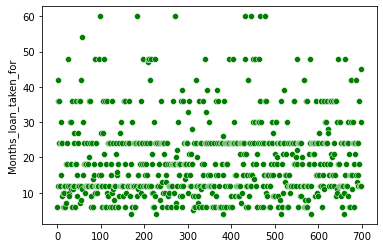

In [84]:
# plotting loan duration of low risk apllicant
sns.scatterplot(y=data_loan_appli['Months_loan_taken_for'][data_aplicnt['high_risk_applicant']==0.0],x=np.arange(0,700),color='green')

This plot shows loan tenure for 5 to 15 years duration is more safe and low risk.

<AxesSubplot:ylabel='Principal_loan_amount'>

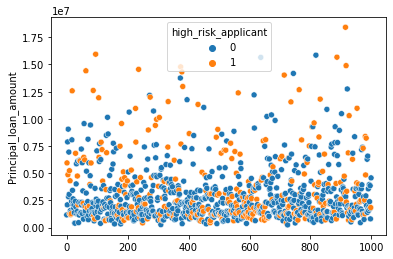

In [85]:
sns.scatterplot(y=data_loan_appli['Principal_loan_amount'],x=np.arange(0,1000),hue='high_risk_applicant',data=data_loan_appli)

<AxesSubplot:xlabel='Number_of_existing_loans_at_this_bank', ylabel='Count'>

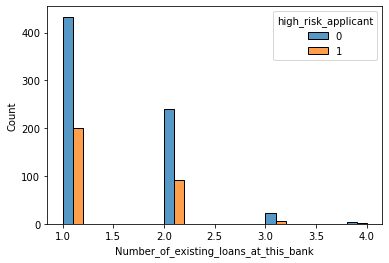

In [86]:
sns.histplot(data=data_loan_appli,hue='high_risk_applicant',x='Number_of_existing_loans_at_this_bank',multiple="dodge",shrink=1)

<AxesSubplot:xlabel='Probability', ylabel='Loan_history'>

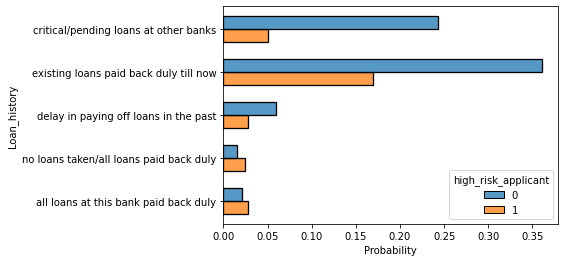

In [87]:
#Property
sns.histplot(data=data_loan_appli,hue='high_risk_applicant',y='Loan_history',multiple="dodge",shrink=0.6,stat='probability')

This plot shows that the applicant with loan history having duly paid loans are getting more loans and have probablity of low risk applicants

### Merging both applicant and loan data to show if there any relation happens across


In [88]:
data_final = pd.merge(data_aplicnt.drop('high_risk_applicant',axis=1),data_loan_appli,on='applicant_id')

<AxesSubplot:>

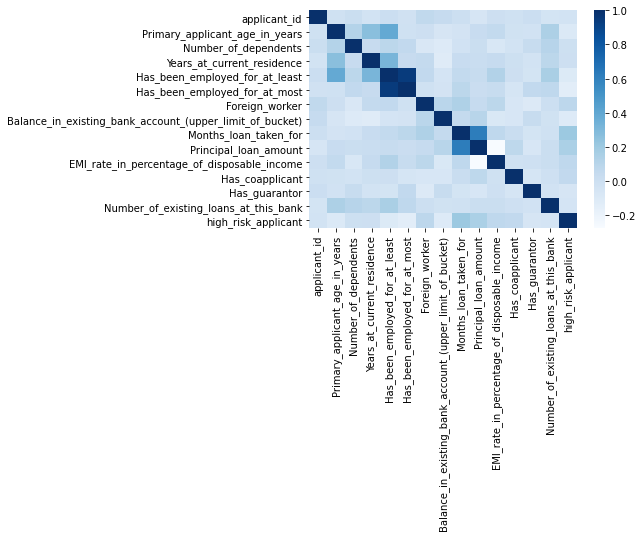

In [89]:
sns.heatmap(data_final.corr(),cmap='Blues')